In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
company=pd.read_csv('D:\\Data Science\\Assignments\\Assignment 14 (Decision Trees)\\Company_Data.csv')
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
company['Sales_range']=pd.cut(company.Sales,bins=[0,3,6,10,14,20],
                             labels=['Poor','Below_Avg','Average','Above_Avg','Outstanding'],include_lowest=True)
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_range
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Average
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,Above_Avg
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,Above_Avg
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Average
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Below_Avg
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,Above_Avg
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,Average
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,Average
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,Below_Avg


In [4]:
company1=pd.get_dummies(company.iloc[:,1:11])
company1

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [5]:
result=pd.concat([company["Sales_range"],company1],axis=1)
display(result)

,Sales_range,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,Average,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,Above_Avg,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,Above_Avg,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,Average,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,Below_Avg,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Above_Avg,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,Average,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,Average,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,Below_Avg,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [6]:
company2=result.copy()
company2

,Sales_range,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,Average,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,Above_Avg,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,Above_Avg,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,Average,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,Below_Avg,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Above_Avg,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,Average,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,Average,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,Below_Avg,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [7]:
x=company2.iloc[:,1:]
y=company2['Sales_range']

In [9]:
x

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [10]:
y

0        Average
1      Above_Avg
2      Above_Avg
3        Average
4      Below_Avg
         ...    
395    Above_Avg
396      Average
397      Average
398    Below_Avg
399      Average
Name: Sales_range, Length: 400, dtype: category
Categories (5, object): ['Poor' < 'Below_Avg' < 'Average' < 'Above_Avg' < 'Outstanding']

In [12]:
colnames=list(x.columns)
colnames

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education',
 'ShelveLoc_Bad',
 'ShelveLoc_Good',
 'ShelveLoc_Medium',
 'Urban_No',
 'Urban_Yes',
 'US_No',
 'US_Yes']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=40)

In [14]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

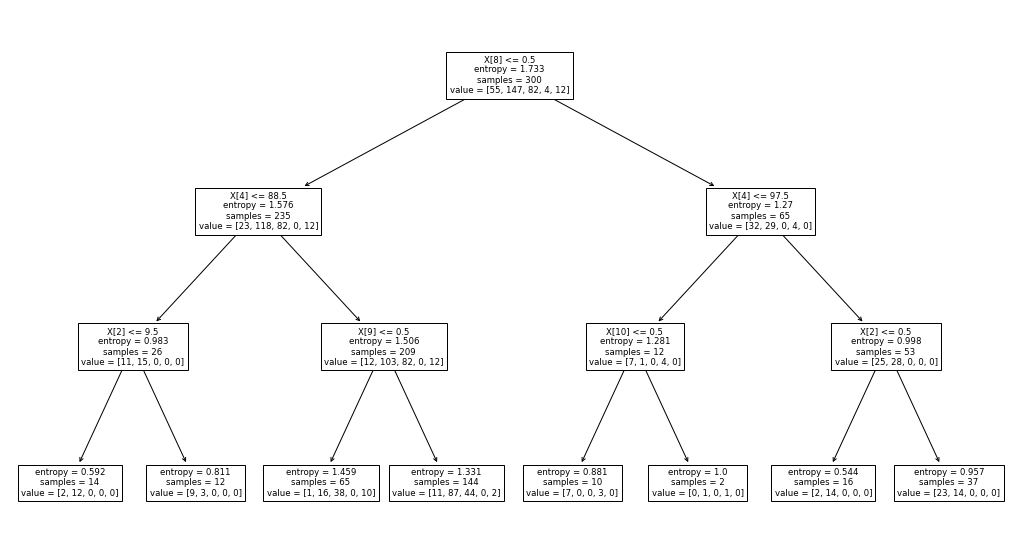

In [15]:
plt.figure(figsize=(18,10))
tree.plot_tree(model);

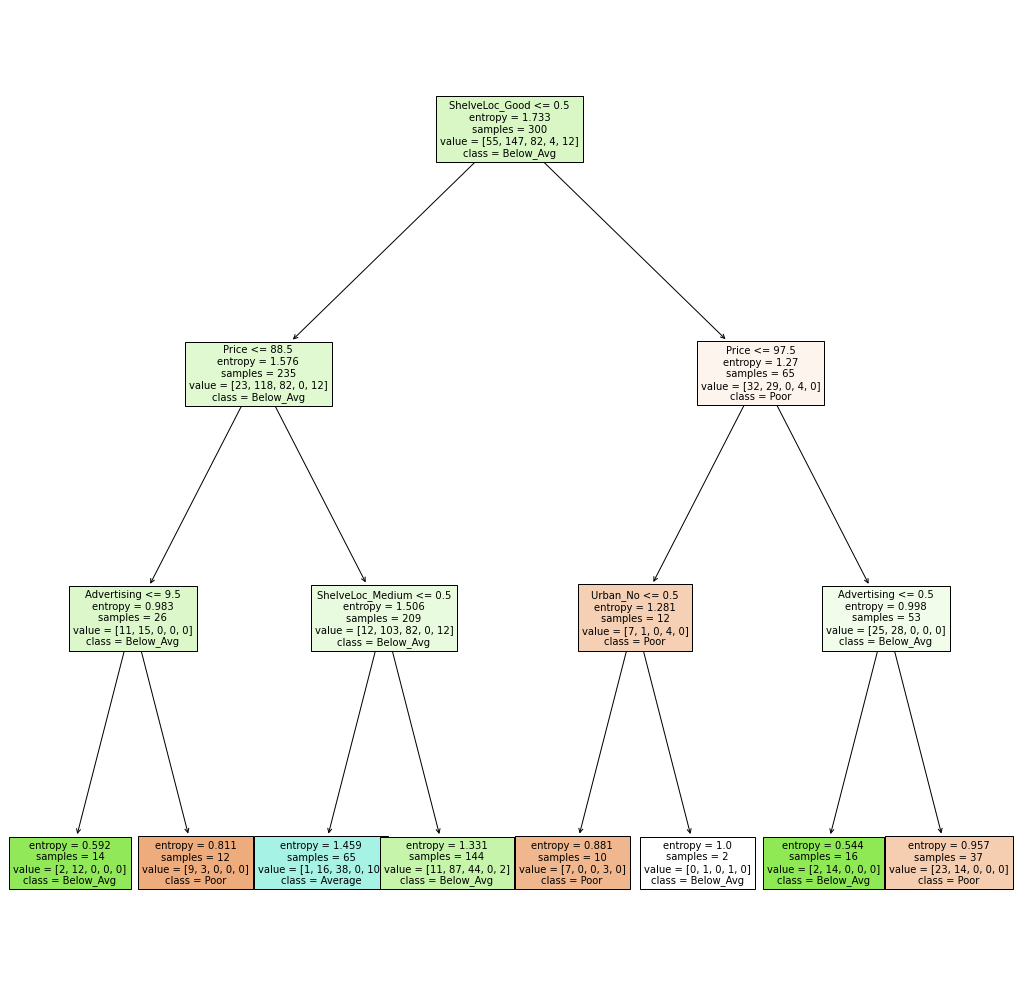

In [19]:
fig, axes = plt.subplots(figsize=(18,18))
fn=['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education',
 'ShelveLoc_Bad',
 'ShelveLoc_Good',
 'ShelveLoc_Medium',
 'Urban_No',
 'Urban_Yes',
 'US_No',
 'US_Yes']
cn=['Poor','Below_Avg','Average','Above_Avg','Outstanding']

tree.plot_tree(model, feature_names=fn,class_names=cn,filled=True,fontsize=10);

In [20]:
# predicting on test data set & count
preds = model.predict(x_test)  
pd.Series(preds).value_counts()

Average      68
Below_Avg    18
Above_Avg    14
dtype: int64

In [21]:
preds

array(['Above_Avg', 'Average', 'Average', 'Average', 'Average', 'Average',
       'Above_Avg', 'Average', 'Average', 'Above_Avg', 'Average',
       'Average', 'Average', 'Below_Avg', 'Above_Avg', 'Below_Avg',
       'Average', 'Average', 'Average', 'Average', 'Average', 'Average',
       'Average', 'Above_Avg', 'Average', 'Average', 'Above_Avg',
       'Below_Avg', 'Above_Avg', 'Above_Avg', 'Average', 'Average',
       'Above_Avg', 'Average', 'Average', 'Average', 'Above_Avg',
       'Below_Avg', 'Average', 'Average', 'Average', 'Below_Avg',
       'Average', 'Average', 'Average', 'Below_Avg', 'Below_Avg',
       'Average', 'Average', 'Average', 'Average', 'Average', 'Average',
       'Average', 'Below_Avg', 'Average', 'Average', 'Average', 'Average',
       'Below_Avg', 'Average', 'Average', 'Average', 'Average',
       'Below_Avg', 'Average', 'Above_Avg', 'Average', 'Below_Avg',
       'Above_Avg', 'Average', 'Average', 'Average', 'Average', 'Average',
       'Average', 'Average', 'A

In [22]:
pd.crosstab(y_test,preds)

col_0,Above_Avg,Average,Below_Avg
Sales_range,,,
Poor,0,3,2
Below_Avg,0,22,9
Average,6,32,7
Above_Avg,8,11,0


In [23]:
np.mean(preds==y_test)

0.49

In [24]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [25]:
pred=model.predict(x_test)
np.mean(preds==y_test)

0.49

In [26]:
from sklearn.model_selection import KFold                         # Bagging#
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [27]:
seed = 7

kfold = KFold(n_splits=10)
cart = DecisionTreeClassifier()
num_trees = 100

In [28]:
Bagging_model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
Bagging_model.fit(x_train,y_train)
results = cross_val_score(Bagging_model, x_train, y_train, cv=kfold)
print(results.mean())

0.6233333333333333


In [29]:
Bagging_preds = Bagging_model.predict(x_test)

In [30]:
pd.crosstab(y_test,Bagging_preds)

col_0,Above_Avg,Average,Below_Avg,Outstanding,Poor
Sales_range,,,,,
Poor,0,1,3,0,1
Below_Avg,0,13,17,0,1
Average,4,34,7,0,0
Above_Avg,10,7,1,1,0


In [31]:
np.mean(Bagging_preds==y_test)

0.62

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10)
Random_forest_model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
Random_forest_model.fit(x_train,y_train)

RandomForestClassifier(max_features=3)

In [34]:
Random_forest_results = cross_val_score(Random_forest_model, x_train, y_train, cv=kfold)
print(Random_forest_results.mean())

0.6066666666666667


In [35]:
Random_forest_preds = Random_forest_model.predict(x_test)
pd.crosstab(y_test,Random_forest_preds)

col_0,Above_Avg,Average,Below_Avg
Sales_range,,,
Poor,0,1,4
Below_Avg,0,18,13
Average,4,37,4
Above_Avg,8,11,0


In [36]:
np.mean(Random_forest_preds==y_test)

0.58

In [37]:
from sklearn.ensemble import AdaBoostClassifier
num_trees = 10
seed=7
kfold = KFold(n_splits=10)
AdaBoost_model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
AdaBoost_model.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=10, random_state=7)

In [38]:
AdaBoost_results = cross_val_score(AdaBoost_model, x_train, y_train, cv=kfold)
print(AdaBoost_results.mean())

0.5399999999999999


In [39]:
AdaBoost_preds = AdaBoost_model.predict(x_test)
pd.crosstab(y_test,AdaBoost_preds)

col_0,Above_Avg,Average,Below_Avg
Sales_range,,,
Poor,0,1,4
Below_Avg,0,13,18
Average,1,32,12
Above_Avg,11,8,0


In [40]:
np.mean(Random_forest_preds==y_test)

0.58